###Importing Libraries and Data:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import mode
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from scipy.stats import zscore

In [ ]:
dfr = pd.read_csv(r'train.csv')
dfs = pd.read_csv(r'test.csv')

### Setting up the Data

In [ ]:
dfr.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3.0,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2.0,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3.0,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3.0,6.0,NaN,0.67


In [ ]:
dfs.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7
12249,fffe32003100390037003800,2008-08-05,Female,Product,No,2.0,2.0,2.0


In [ ]:
# plt.figure(figsize=(8, 10))
# plt.scatter(range(len(dfr['Mental Fatigue Score'])), dfr['Mental Fatigue Score'], color='red')
# plt.show()

In [ ]:
dfr['Company Type'].value_counts()

Service    14833
Product     7917
Name: Company Type, dtype: int64

In [ ]:
dfr['Gender'] = dfr['Gender'].apply(lambda x: 0 if x=='Female' else 1)
dfs['Gender'] = dfs['Gender'].apply(lambda x: 0 if x=='Female' else 1)
dfr['Company Type'] = dfr['Company Type'].apply(lambda x: 0 if x=='Service' else 1)
dfs['Company Type'] = dfs['Company Type'].apply(lambda x: 0 if x=='Service' else 1)
dfr['WFH Setup Available'] = dfr['WFH Setup Available'].apply(lambda x: 0 if x=='No' else 1)
dfs['WFH Setup Available'] = dfs['WFH Setup Available'].apply(lambda x: 0 if x=='No' else 1)
id = dfs['Employee ID']
dfr = dfr.drop(columns=['Employee ID'])
dfs = dfs.drop(columns=['Employee ID'])

In [ ]:
dfr[['Day of joining', 'Month of joining', 'Year of joining']] = dfr['Date of Joining'].str.split('-', expand = True)
# for i in dfr.index:
#   if (int(dfr['Day of joining'].loc[i]) > 15):
#     value = dfr.loc[i, 'Month of joining']
#     value = int(value)
#     value += 1
#     if (value < 10):
#       value = str(0)+str(value)
#     else:
#       value = str(value)
#     dfr.at[i, 'Month of joining'] = value
dfr = dfr.drop(columns = ['Year of joining', 'Day of joining', 'Date of Joining'])
dfs[['Day of joining', 'Month of joining', 'Year of joining']] = dfs['Date of Joining'].str.split('-', expand = True)
# for i in dfs.index:
#   if (int(dfs['Day of joining'].loc[i]) > 15):
#     value = dfs.loc[i, 'Month of joining']
#     value = int(value)
#     value += 1
#     if (value < 10):
#       value = str(0)+str(value)
#     else:
#       value = str(value)
#     dfs.at[i, 'Month of joining'] = value
dfs = dfs.drop(columns = ['Year of joining', 'Day of joining', 'Date of Joining'])

In [ ]:
dfr.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month of joining
0,0,0,0,2.0,3.0,3.8,0.16,09
1,1,0,1,1.0,2.0,5.0,0.36,11
2,0,1,1,2.0,NaN,5.8,0.49,03
3,1,0,1,1.0,1.0,2.6,0.20,11
4,0,0,0,3.0,7.0,6.9,0.52,07


In [ ]:
dfr['Month of joining'].value_counts()

08    1972
10    1970
09    1968
03    1947
07    1911
01    1903
05    1900
04    1861
12    1844
11    1841
02    1832
06    1801
Name: Month of joining, dtype: int64

In [ ]:
dfr['Designation'].value_counts()

2.0    7588
3.0    5985
1.0    4881
4.0    2391
0.0    1507
5.0     398
Name: Designation, dtype: int64

###Missing values treatment

In [ ]:
dfr.describe()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,22750.000000,22750.000000,22750.000000,21369.000000,20633.000000,21626.000000
mean,0.476571,0.348000,0.540220,2.178725,4.481398,5.728188,0.452005
std,0.499462,0.476346,0.498391,1.135145,2.047211,1.920839,0.198226
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,4.600000,0.310000
50%,0.000000,0.000000,1.000000,2.000000,4.000000,5.900000,0.450000
75%,1.000000,1.000000,1.000000,3.000000,6.000000,7.100000,0.590000
max,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000,1.000000


In [ ]:
dfs.describe()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
count,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000
mean,0.473878,0.346612,0.541878,2.175265,4.458857,5.720571
std,0.499338,0.475910,0.498264,1.132885,2.045602,1.914063
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,4.500000
50%,0.000000,0.000000,1.000000,2.000000,4.000000,5.900000
75%,1.000000,1.000000,1.000000,3.000000,6.000000,7.100000
max,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000


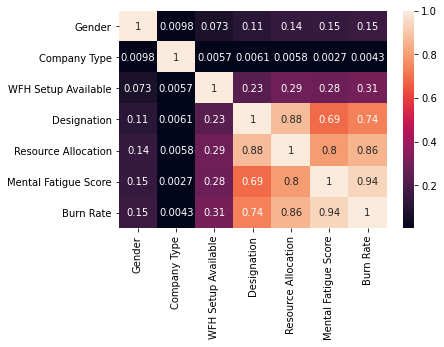

In [ ]:
corrMatrix = dfr.corr()
corrMatrix = corrMatrix.apply(lambda x: abs(x))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Method #1: Listwise Deletion

In [ ]:
dfr.dropna(inplace=True)
dfr.describe()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000
mean,0.475686,0.345132,0.539537,2.179398,4.486552,5.732173,0.452444
std,0.499422,0.475424,0.498448,1.133148,2.044848,1.920547,0.197848
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,4.600000,0.320000
50%,0.000000,0.000000,1.000000,2.000000,4.000000,5.900000,0.450000
75%,1.000000,1.000000,1.000000,3.000000,6.000000,7.100000,0.590000
max,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000,1.000000


Method #2: Mean or Null Substitution

In [ ]:
# nan_col = ['Resource Allocation',	'Mental Fatigue Score',	'Burn Rate']
# for i in nan_col:
#   dfr[i] = dfr[i].fillna(np.mean(dfr[i]))#(0)
# dfr.describe()  

Method #3: Regression Imputation

In [ ]:
# nan_col = ['Resource Allocation',	'Mental Fatigue Score',	'Burn Rate']
# traindat = dfr.dropna() #Create a dataset to train the model
# filler = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, fit_intercept=True, normalize=True, max_iter=10000)
# for i in nan_col:
#   yy = traindat[i]
#   if (i=='Resource Allocation'): #Filling these values using designation, as covariance is high
#     xx = traindat[['Designation']] 
#     filler.fit(xx, yy) #model has been trained
#     nully = dfr[i].isnull() #a boolean array which will store True if corresponding ResAlloc value is null
#     for j in dfr.index: #using model to fill each missing value
#       if (nully[j] == True): #if missing value is detected in ResAlloc
#         #update missing value using corresponding designation value in LR model
#         dfr.at[j, i] = filler.predict(dfr['Designation'].loc[j].reshape(1, -1))
#   elif (i=='Mental Fatigue Score'):
#     xx = traindat[['Resource Allocation']] 
#     filler.fit(xx, yy) 
#     nully = dfr[i].isnull()
#     for j in dfr.index:
#       if (nully[j] == True): 
#         dfr.at[j, i] = filler.predict(dfr['Resource Allocation'].loc[j].reshape(1, -1))
#   else:
#     xx = traindat[['Mental Fatigue Score']]
#     filler.fit(xx, yy) 
#     nully = dfr[i].isnull() 
#     for j in dfr.index: 
#       if (nully[j] == True):
#         dfr.at[j, i] = filler.predict(dfr['Mental Fatigue Score'].loc[j].reshape(1, -1))
# dfr.describe()

Method #4: CarryForward Last Value

In [ ]:
# nan_col = ['Resource Allocation',	'Mental Fatigue Score',	'Burn Rate']
# for i in nan_col:
#   nully = dfr[i].isnull() #a boolean array which will store True if corresponding value is null
#   for j in dfr.index: #fill each missing value
#     if (nully[j] == True): 
#       dfr.at[j, i] = dfr.at[j-1, i]
# dfr.describe()

###Outlier Treatment:

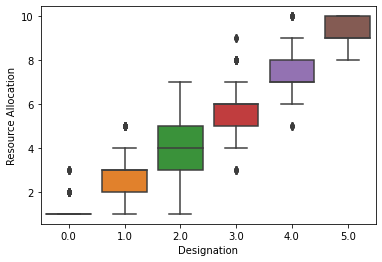

In [ ]:
ax = sns.boxplot(x="Designation", y="Resource Allocation", data=dfr)

for each different value of designation,
store zscore of resource values in that designation
create a filter to remove rows which have outliers
iterate thorugh whole dataframe
if designation value is what we are working on
if zscore is not maximum i.e., value if not a outlier
then do not remove it

In [ ]:
# # for i in dfr['Designation'].unique():
# for i in [0, 1, 3, 4]:
#   # a = list(np.abs(zscore(dfr['Resource Allocation'][dfr['Designation']==i]))) #excludes lower outliers
#   a = list(zscore(dfr['Resource Allocation'][dfr['Designation']==i]))
#   # print("Initial", max(a))
#   filtr = []
#   count = 0
#   arr = list(dfr['Resource Allocation'].where(dfr['Designation'] == i).notna()) #boolean array, true if designation is desired value
#   for j in range(len(dfr)):
#     if (arr[j]):
#       if ((a[count] != max(a)) and (a[count] != min(a))):
#         filtr.append(False)
#         count += 1 
#       else:
#         filtr.append(True)
#         count += 1
#     else:
#       filtr.append(False)
#   index_names = dfr[filtr].index
#   dfr.drop(index_names, inplace=True)
#   #verification:
#   a = np.abs(zscore(dfr['Resource Allocation'][dfr['Designation']==i]))
#   # print("Final", max(a))
#   print("Length of DataFrame", len(dfr))

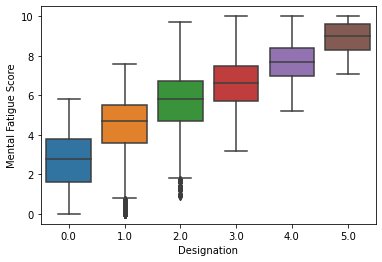

In [ ]:
ax = sns.boxplot(x="Designation", y="Mental Fatigue Score", data=dfr)

In [ ]:
# for i in [1, 2]:
#   # a = list(np.abs(zscore(dfr['Mental Fatigue Score'][dfr['Designation']==i])))
#   a = list(zscore(dfr['Mental Fatigue Score'][dfr['Designation']==i]))
#   # print("Initial", max(a))
#   filtr = []
#   count = 0
#   arr = list(dfr['Mental Fatigue Score'].where(dfr['Designation'] == i).notna()) #boolean array, true if designation is desired value
#   for j in range(len(dfr)):
#     if (arr[j]):
#       if ((a[count] != max(a)) and (a[count] != min(a))):
#         filtr.append(False)
#         count += 1 
#       else:
#         filtr.append(True)
#         count += 1
#     else:
#       filtr.append(False)
#   index_names = dfr[filtr].index
#   dfr.drop(index_names, inplace=True)
#   #verification:
#   a = np.abs(zscore(dfr['Mental Fatigue Score'][dfr['Designation']==i]))
#   # print("Final", max(a))
#   print("Length of DataFrame", len(dfr))

Length of DataFrame 18526
Length of DataFrame 18522


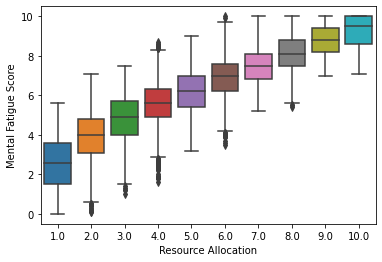

In [ ]:
ax = sns.boxplot(x="Resource Allocation", y="Mental Fatigue Score", data=dfr)

For each value of resource allocation, remove the rows with outliers in fatigue score

In [ ]:
# for i in [2, 3, 4, 6, 8]:
#   # a = list(np.abs(zscore(dfr['Mental Fatigue Score'][dfr['Resource Allocation']==i])))
#   a = list(zscore(dfr['Mental Fatigue Score'][dfr['Resource Allocation']==i]))
#   # print("Initial", max(a))
#   filtr = []
#   count = 0
#   arr = list(dfr['Mental Fatigue Score'].where(dfr['Resource Allocation'] == i).notna()) #boolean array, true if designation is desired value
#   for j in range(len(dfr)):
#     if (arr[j]):
#       if ((a[count] != max(a)) and (a[count] != min(a))):
#         filtr.append(False)
#         count += 1 
#       else:
#         filtr.append(True)
#         count += 1
#     else:
#       filtr.append(False)
#   index_names = dfr[filtr].index
#   dfr.drop(index_names, inplace=True)
#   #verification:
#   a = np.abs(zscore(dfr['Mental Fatigue Score'][dfr['Resource Allocation']==i]))
#   # print("Final", max(a))
#   print("Length of DataFrame", len(dfr))

Length of DataFrame 18518
Length of DataFrame 18515
Length of DataFrame 18513
Length of DataFrame 18511
Length of DataFrame 18491


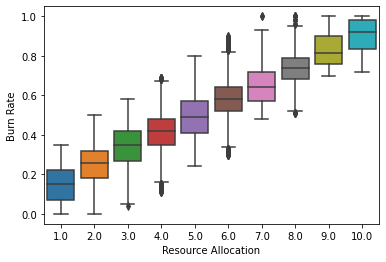

In [ ]:
ax = sns.boxplot(x="Resource Allocation", y="Burn Rate", data=dfr)

Do the same for burn rate

In [ ]:
# for i in [3, 4, 6, 7, 8]:
#   # a = list(np.abs(zscore(dfr['Burn Rate'][dfr['Resource Allocation']==i])))
#   a = list(zscore(dfr['Burn Rate'][dfr['Resource Allocation']==i]))
#   # print("Initial", max(a))
#   filtr = []
#   count = 0
#   arr = list(dfr['Burn Rate'].where(dfr['Resource Allocation'] == i).notna()) #boolean array, true if designation is desired value
#   for j in range(len(dfr)):
#     if (arr[j]):
#       if ((a[count] != max(a)) and (a[count] != min(a))):
#         filtr.append(False)
#         count += 1 
#       else:
#         filtr.append(True)
#         count += 1
#     else:
#       filtr.append(False)
#   index_names = dfr[filtr].index
#   dfr.drop(index_names, inplace=True)
#   #verification:
#   a = np.abs(zscore(dfr['Burn Rate'][dfr['Resource Allocation']==i]))
#   # print("Final", max(a))
#   print("Length of DataFrame", len(dfr))

Length of DataFrame 18489
Length of DataFrame 18473
Length of DataFrame 18464
Length of DataFrame 18460
Length of DataFrame 18447


###Feature Engineering

In [ ]:
dfr['F1'] = dfr['Resource Allocation']*dfr['Designation']
dfs['F1'] = dfs['Resource Allocation']*dfs['Designation']
dfr['F2'] = dfr['Resource Allocation']*dfr['Mental Fatigue Score']
dfs['F2'] = dfs['Resource Allocation']*dfs['Mental Fatigue Score']
dfr['F3'] = dfr['Resource Allocation'] + 2.25*dfr['Mental Fatigue Score']
dfs['F3'] = dfs['Resource Allocation'] + 2.25*dfs['Mental Fatigue Score']

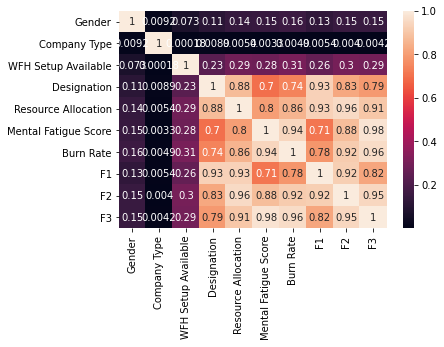

In [ ]:
corrMatrix = dfr.corr()
corrMatrix = corrMatrix.apply(lambda x: abs(x))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
dfr.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month of joining,F1,F2,F3
0,0,0,0,2.0,3.0,3.8,0.16,09,6.0,11.4,11.550
1,1,0,1,1.0,2.0,5.0,0.36,11,2.0,10.0,13.250
3,1,0,1,1.0,1.0,2.6,0.20,11,1.0,2.6,6.850
4,0,0,0,3.0,7.0,6.9,0.52,07,21.0,48.3,22.525
5,1,1,1,2.0,4.0,3.6,0.29,11,8.0,14.4,12.100


Company type is not contributing towards the results, also, the gender seems to not be contributing much. [Based on covariance matrix]

In [ ]:
dfr.drop(columns=['Company Type'], inplace=True)
dfs.drop(columns=['Company Type'], inplace=True)
dfr.head()

,Gender,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month of joining,F1,F2,F3
0,0,0,2.0,3.0,3.8,0.16,09,6.0,11.4,11.550
1,1,1,1.0,2.0,5.0,0.36,11,2.0,10.0,13.250
3,1,1,1.0,1.0,2.6,0.20,11,1.0,2.6,6.850
4,0,0,3.0,7.0,6.9,0.52,07,21.0,48.3,22.525
5,1,1,2.0,4.0,3.6,0.29,11,8.0,14.4,12.100


Applying PCA to check covariance explained with reduced dimensions:

In [ ]:
X = dfr.drop(columns=['Burn Rate'])
y = dfr['Burn Rate']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# N = 4
# pca = PCA(n_components = N)
# pca.fit(X)
# plt.bar(range(N), pca.explained_variance_ratio_, color = 'orange')
# plt.plot(range(N), pca.explained_variance_ratio_, color='black')
# plt.show()
# print(pca.explained_variance_ratio_)

3 Components explain 91.7% variance, thus, reducing dimensions to 3. 4 Components explain 97%

In [ ]:
# X = pca.transform(X)
x = pd.DataFrame(X)

###Applying Regression Algorithms:

In [ ]:
models = ['Linear Regression', 'XgBoost']#, 'Lasso', 'Elastic Net CV', 'Ridge', 'RidgeCV', 'SGDRegressor', 'HuberRegressor', 'TheilSenRegressor','Neural Network']#, 'AdaBoost', 'ARDRegression', 'Polynomial Regression']
MSE = []
r2 = []
MAS = []
Maxe = []

In [ ]:
def evaluate(truth, pred):
  MSE.append(mean_squared_error(truth, pred))
  r2.append(r2_score(truth, pred))
  MAS.append(mean_absolute_error(truth, pred))
  Maxe.append(max_error(truth, pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.999)

In [ ]:
LR = LinearRegression(normalize=True) #use np.polyfit for polynomial regression
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
xgb_model = xgb.XGBRegressor(eta=0.001, max_depth = 6, subsample = 1, colsample_bytree = 0.5, objective = 'reg:linear', normalize=True, eval_metric = 'rmse') #Change objective accordingly
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
evaluate(y_test, y_pred)

[10:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# lasso = Lasso(random_state=0, max_iter=10000)
# alphas = np.logspace(-4, -0.5, 30)

# tuned_parameters = [{'alpha': alphas}]
# n_folds = 10

# clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, n_jobs=1, scoring='neg_mean_squared_error')
# clf.fit(x, y)
# scores = clf.cv_results_['mean_test_score']
# MSE.append(-1*max(scores))
# r2.append(-1*max(scores))
# MAS.append(-1*max(scores))
# Maxe.append(-1*max(scores))

In [ ]:
# ENcv = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, fit_intercept=True, normalize=True, max_iter=10000)
# ENcv.fit(X_train, y_train)
# y_pred = ENcv.predict(X_test)
# evaluate(y_test, y_pred)

In [ ]:
# r = Ridge(normalize=True)
# r.fit(X_train, y_train)
# y_pred = r.predict(X_test)
# evaluate(y_test, y_pred)

In [ ]:
# rCV = RidgeCV(normalize=True)
# rCV.fit(X_train, y_train)
# y_pred = rCV.predict(X_test)
# evaluate(y_test, y_pred)

In [ ]:
# sgdr = SGDRegressor(loss='squared_loss') #The possible values are ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’
# sgdr.fit(X_train, y_train)
# y_pred = sgdr.predict(X_test)
# evaluate(y_test, y_pred)

In [ ]:
# hub = HuberRegressor(epsilon = 1.1, max_iter = 800)  #Epsilon min = 1, default = 1.35. The smaller the epsilon, the more robust it is to outliers.
# hub.fit(X_train, y_train)
# y_pred = hub.predict(X_test)
# evaluate(y_test, y_pred)

In [ ]:
# theil = TheilSenRegressor()
# theil.fit(X_train, y_train)
# y_pred = theil.predict(X_test)
# evaluate(y_test, y_pred)

In [ ]:
# NN = MLPRegressor(hidden_layer_sizes=(8, 4, 1), activation='logistic', solver='adam', 
#                    alpha=0.0001, batch_size='auto', learning_rate='adaptive', 
#                    learning_rate_init=0.001, power_t=0.5, max_iter=10000, 
#                    shuffle=True, random_state=0, tol=0.00001, verbose=False, warm_start=False, 
#                    momentum=0.9, nesterovs_momentum=True, early_stopping=True, 
#                    validation_fraction=0.2, beta_1=0.9, beta_2=0.999, 
#                    epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
# NN.fit(X_train, y_train)
# y_pred = NN.predict(X_test)
# evaluate(y_test, y_pred)

In [ ]:
# param_dist = {
#  'n_estimators': [50, 100, 200],
#  'learning_rate' : [0.001,0.05,0.1],
#  'loss' : ['linear', 'square', 'exponential']
#  }

# abr = GridSearchCV(AdaBoostRegressor(), param_dist, cv=5, n_jobs=1, scoring='r2')
# abr.fit(x, y)
# MSE.append(-1*max(abr.cv_results_['mean_test_score']))
# r2.append(-1*max(abr.cv_results_['mean_test_score']))
# MAS.append(-1*max(abr.cv_results_['mean_test_score']))
# Maxe.append(-1*max(abr.cv_results_['mean_test_score']))

In [ ]:
# #Takes a long time to run - WARNING
# ardr = ARDRegression(n_iter = 5, normalize=True)
# ardr.fit(X_train, y_train)
# y_pred = ardr.predict(X_test)
# evaluate(y_test, y_pred)

In [ ]:
# d = 1 #set degree of curve fitting
# coef = np.polyfit(X_train[:,0], y_train, d) #select column with maximum correlation for best results
# def curvefit(x):
#   y = 0
#   for j in range(d):
#     y += (x**(d-j))*coef[j] #find pattern and put in loop
#   return y

# y_pred = [curvefit(int(i)) for i in X_test[:,0]]
# evaluate(y_test, y_pred)

###Performance metrics

In [ ]:
Final = {'Model': models, 'Mean Square Error': MSE, 'R2 score': r2, 'Mean Absolute Error' : MAS, 'Max Error': Maxe}
Final = pd.DataFrame(data=Final)
Final

,Model,Mean Square Error,R2 score,Mean Absolute Error,Max Error
0,Linear Regression,0.001624,0.931086,0.032864,0.078961
1,XgBoost,0.001941,0.917623,0.036947,0.091302


###Final Submission:

In [ ]:
dfs = scaler.fit_transform(dfs)
# dfs = pca.fit_transform(dfs)
dfs = pd.DataFrame(dfs)
ansy = xgb_model.predict(dfs) #Remember to train on 100% data before submission
ide = []
ansye = []
for i in range(len(ansy)+1):
  if(i == 0):
    ide.append("Employee ID")
    ansye.append("Burn Rate")
  else:
    ide.append(id[i-1])
    ansye.append(ansy[i-1])

np.savetxt("Pred xgb.csv", list(zip(ide, ansye)), delimiter=",", fmt='%s')